# Extracts and exports a single point from Greenland input data for testing the FDM on an offline machine

In [132]:
# import tools

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

import warnings
warnings.filterwarnings("ignore")

In [58]:
# path to data

average_dir = "/Users/Case0005/Projects/FDM/data/input/averages/"
timeseries_dir = "/Users/Case0005/Projects/FDM/data/input/timeseries/"
path_to_pointlist = "/Users/Case0005/Projects/fdm/data/reference/IN_ll_FGRN055_GrIS_GIC_implicit.txt"
part_num = "10"

ff10m_ave = xr.open_dataset(average_dir+"ff10m_FGRN055_era055-1939_1940-1970_ave.nc")
evap_ave = xr.open_dataset(average_dir+"evap_FGRN055_era055-1939_1940-1970_ave.nc")
precip_ave = xr.open_dataset(average_dir+"precip_FGRN055_era055-1939_1940-1970_ave.nc")
sndiv_ave = xr.open_dataset(average_dir+"sndiv_FGRN055_era055-1939_1940-1970_ave.nc")
snowfall_ave = xr.open_dataset(average_dir+"snowfall_FGRN055_era055-1939_1940-1970_ave.nc")
snowmelt_ave = xr.open_dataset(average_dir+"snowmelt_FGRN055_era055-1939_1940-1970_ave.nc")
tskin_ave = xr.open_dataset(average_dir+"tskin_FGRN055_era055-1939_1940-1970_ave.nc")

ave_datasets = [ff10m_ave, evap_ave, precip_ave, sndiv_ave, snowfall_ave, snowmelt_ave, tskin_ave]

ff10m_ts = xr.open_dataset(timeseries_dir+"ff10m_FGRN055_era055_1939-2023_p"+part_num+".nc")
evap_ts = xr.open_dataset(timeseries_dir+"evap_FGRN055_era055_1939-2023_p"+part_num+".nc")
precip_ts = xr.open_dataset(timeseries_dir+"precip_FGRN055_era055_1939-2023_p"+part_num+".nc")
sndiv_ts = xr.open_dataset(timeseries_dir+"sndiv_FGRN055_era055_1939-2023_p"+part_num+".nc")
snowfall_ts = xr.open_dataset(timeseries_dir+"snowfall_FGRN055_era055_1939-2023_p"+part_num+".nc")
snowmelt_ts = xr.open_dataset(timeseries_dir+"snowmelt_FGRN055_era055_1939-2023_p"+part_num+".nc")
tskin_ts = xr.open_dataset(timeseries_dir+"tskin_FGRN055_era055_1939-2023_p"+part_num+".nc")

ts_datasets = [ff10m_ts, evap_ts, precip_ts, sndiv_ts, snowfall_ts, snowmelt_ts, tskin_ts]

pointlist_pd = pd.read_csv(path_to_pointlist,names=["lon","lat"],usecols=[0,1])

In [100]:
ff10m_ts

<xarray.Dataset> Size: 3GB
Dimensions:       (time: 246424, nblock1: 40, nblock2: 400, bnds: 2, rlat: 566,
                   rlon: 6, height: 1)
Coordinates:
  * height        (height) float64 8B 0.0
    lat           (rlat, rlon) float64 27kB ...
    lon           (rlat, rlon) float64 27kB ...
  * rlat          (rlat) float64 5kB -14.4 -14.35 -14.3 ... 13.75 13.8 13.85
  * rlon          (rlon) float64 48B -7.35 -7.3 -7.25 -7.2 -7.15 -7.1
  * time          (time) datetime64[ns] 2MB 1939-09-01 ... 2023-12-31T21:00:00
Dimensions without coordinates: nblock1, nblock2, bnds
Data variables:
    assigned      (time) int32 986kB ...
    block1        (nblock1) int32 160B ...
    block2        (nblock2) int32 2kB ...
    date_bnds     (time, bnds) int32 2MB ...
    dir           (rlat, rlon) float64 27kB ...
    dtg           (time) int32 986kB ...
    ff10m         (time, height, rlat, rlon) float32 3GB ...
    hms_bnds      (time, bnds) int32 2MB ...
    rotated_pole  float32 4B ...
    time_bnds     (time, bnds) datetime64[ns] 4MB ...
Attributes:
    Conventions:   CF-1.4
    source:        RACMO2
    Domain:        FGRN055
    Experiment:    BN_RACMO2.3p2_ERA5_3h_1940_FGRN055
    institution:   Royal Netherlands Meteorological Institute (KNMI)
    CreationDate:  Tue Apr 11 19:38:12 2023
    comment:       asim2cdf: cpar=ff10m, iwmo=171, ilvt=105, ilev=10, idh=3, ...
    title:         10-m Wind Speed
    history:       Mon Dec  2 20:14:42 2024: ncrcat /ec/res4/scratch/nld4814/...
    NCO:           netCDF Operators version 5.1.9 (Homepage = http://nco.sf.n...

In [ ]:
rlat = 1.0
rlon = -7.15

lat = ff10m_ave.sel(rlat=rlat).sel(rlon=rlon).lat.values
lon = ff10m_ave.sel(rlat=rlat).sel(rlon=rlon).lon.values

print(lat,lon)

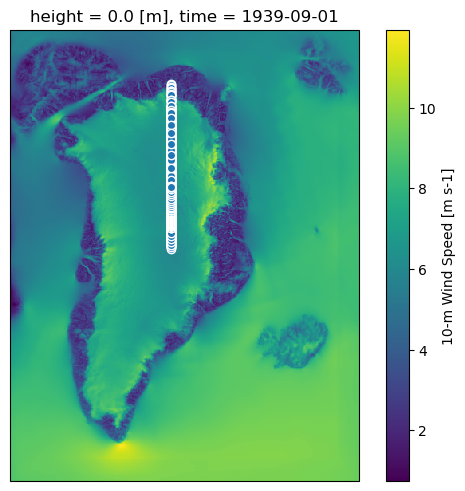

In [149]:
rpcrs = ccrs.RotatedPole(pole_latitude=18.0,pole_longitude=142.5,central_rotated_longitude=-37.5)

fig = plt.figure(layout="constrained")
subfigs = fig.subfigures(1,1)
axs = subfigs.subplots(1,1,subplot_kw={'projection':ccrs.RotatedPole(pole_latitude=18.0,pole_longitude=142.5,central_rotated_longitude=-37.5)})

#axs.gridlines(draw_labels=True)

ff10m_ave.isel(time=0).ff10m.plot(transform=rpcrs)
ff10m_ts.isel(time=0).ff10m.plot.scatter(transform=rpcrs)

In [52]:
#create datasets from point choice

ave = ff10m_ave.sel(rlat=rlat).sel(rlon=rlon)
ave["evap"] = evap_ave.sel(rlat=rlat).sel(rlon=rlon)["evap"]
ave["precip"] = precip_ave.sel(rlat=rlat).sel(rlon=rlon)["precip"]
ave["sndiv"] = sndiv_ave.sel(rlat=rlat).sel(rlon=rlon)["sndiv"]
ave["snowmelt"] = snowmelt_ave.sel(rlat=rlat).sel(rlon=rlon)["snowmelt"]
ave["snowfall"] = snowfall_ave.sel(rlat=rlat).sel(rlon=rlon)["snowfall"]
ave["tskin"] = tskin_ave.sel(rlat=rlat).sel(rlon=rlon)["tskin"]

ts = ff10m_ts.sel(rlat=rlat).sel(rlon=rlon)
ts["evap"] = evap_ts.sel(rlat=rlat).sel(rlon=rlon)["evap"]
ts["precip"] = precip_ts.sel(rlat=rlat).sel(rlon=rlon)["precip"]
ts["sndiv"] = sndiv_ts.sel(rlat=rlat).sel(rlon=rlon)["sndiv"]
ts["snowmelt"] = snowmelt_ts.sel(rlat=rlat).sel(rlon=rlon)["snowmelt"]
ts["snowfall"] = snowfall_ts.sel(rlat=rlat).sel(rlon=rlon)["snowfall"]
ts["tskin"] = tskin_ts.sel(rlat=rlat).sel(rlon=rlon)["tskin"]


<xarray.Dataset> Size: 19MB
Dimensions:       (time: 246424, nblock1: 40, nblock2: 400, bnds: 2, height: 1)
Coordinates:
  * height        (height) float64 8B 0.0
    lat           float64 8B ...
    lon           float64 8B ...
    rlat          float64 8B -14.35
    rlon          float64 8B -7.25
  * time          (time) datetime64[ns] 2MB 1939-09-01 ... 2023-12-31T21:00:00
Dimensions without coordinates: nblock1, nblock2, bnds
Data variables: (12/16)
    assigned      (time) int32 986kB ...
    block1        (nblock1) int32 160B ...
    block2        (nblock2) int32 2kB ...
    date_bnds     (time, bnds) int32 2MB ...
    dir           float64 8B ...
    dtg           (time) int32 986kB ...
    ...            ...
    evap          (time, height) float32 986kB ...
    precip        (time, height) float32 986kB ...
    sndiv         (time, height) float32 986kB ...
    snowmelt      (time, height) float32 986kB ...
    snowfall      (time, height) float32 986kB ...
    tskin         (time, height) float32 986kB ...
Attributes:
    Conventions:   CF-1.4
    source:        RACMO2
    Domain:        FGRN055
    Experiment:    BN_RACMO2.3p2_ERA5_3h_1940_FGRN055
    institution:   Royal Netherlands Meteorological Institute (KNMI)
    CreationDate:  Tue Apr 11 19:38:12 2023
    comment:       asim2cdf: cpar=ff10m, iwmo=171, ilvt=105, ilev=10, idh=3, ...
    title:         10-m Wind Speed
    history:       Mon Dec  2 20:14:42 2024: ncrcat /ec/res4/scratch/nld4814/...
    NCO:           netCDF Operators version 5.1.9 (Homepage = http://nco.sf.n...